<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/Day083_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 嘗試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [0]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Input


def build_mlp(input, output=10, units=[256,128, 128], bn=0):
  '''
  code here
  '''
    # bn = 0, BN is after activation, bn = 1, BN is before activation
    input_layer = Input(input)
    j=0
    for n in units:
      j+=1
      if bn == 0:
        x = Dense(units=n)(input_layer) #, name='hidden_layer'+str(j))(input_layer)
        x = Activation('relu')(x)
        x = BatchNormalization()(x)
      else:
        x = Dense(units=n)(input_layer) #, name='hidden_layer'+str(j))(input_layer)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=[input_layer], outputs=[output])
    return model


    

In [0]:
"""Code Here
設定超參數
"""
epochs=50
batch_size=256


In [12]:
x_train.shape[1:]

(3072,)

In [28]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
bn=[0, 1]
for b in bn:
  if b == 0:
    print('bn is after acivation')
    model = build_mlp(input=x_train.shape[1:],output=10, units=[256,128, 128], bn = b)
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
    results['bn is after activation'] = {'train-loss': model.history.history["loss"],'valid-loss': model.history.history["val_loss"], 'train-acc': model.history.history["acc"], 'valid-acc': model.history.history["val_acc"]}
  if b == 1: 
    print('bn is after acivation')
    model = build_mlp(x_train.shape[1:],10, bn = b)
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
    results['bn is before activation'] = {'train-loss': model.history.history["loss"],'valid-loss': model.history.history["val_loss"], 'train-acc': model.history.history["acc"], 'valid-acc': model.history.history["val_acc"]}



bn is after acivation
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7844 - acc: 0.3815 - val_loss: 1.7692 - val_acc: 0.3826
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6542 - acc: 0.4281 - val_loss: 1.7359 - val_acc: 0.3912
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5961 - acc: 0.4486 - val_loss: 1.6930 - val_acc: 0.4092
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5583 - acc: 0.4593 - val_loss: 1.6833 - val_acc: 0.4124
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5234 - acc: 0.4716 - val_loss: 1.9234 - val_acc: 0.3257
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4885 - acc: 0.4812 - val_loss: 1.6162 - val_acc: 0.4253
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4620 - acc: 0.4909 - val_

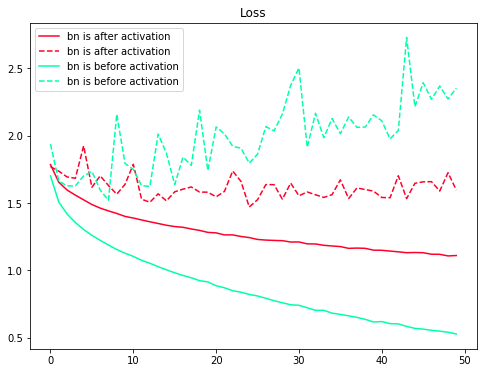

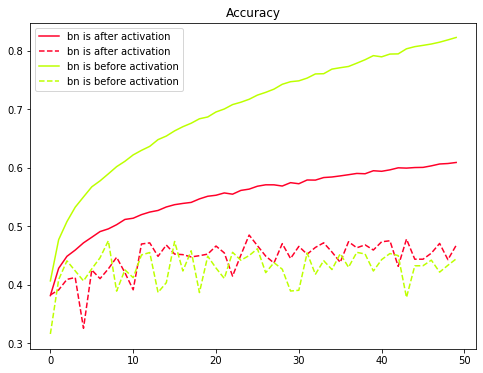

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i*10])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i*10])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i*5])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i*5])
plt.title("Accuracy")
plt.legend()
plt.show()
